In [53]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [54]:
import os

In [55]:
cwd=os.getcwd()
traindir=os.path.join(cwd, 'Preprocessed-Data','training-data')
testdir=os.path.join(cwd, 'Preprocessed-Data','testing-data')

In [56]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5894, 0.5894, 0.5894], std=[0.2729, 0.2729, 0.2729]),
                              transforms.Grayscale(num_output_channels=1)])

In [57]:
trainData=datasets.ImageFolder(traindir, transform=transform)
testData=datasets.ImageFolder(testdir, transform=transform)

In [58]:
# parameters for dataloaders

batch_size=4
num_workers=2

In [59]:
trainloader=DataLoader(trainData,
                       batch_size=batch_size,
                       num_workers=num_workers)

In [60]:
testloader=DataLoader(testData,
                      batch_size=batch_size,
                      num_workers=num_workers)

In [61]:
class_names=trainData.classes
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [62]:
for images, labels in trainloader:
    print(images.shape, labels.shape)
    break

torch.Size([4, 1, 128, 128]) torch.Size([4])


torch.Size([4, 1, 128, 128]) torch.Size([4])


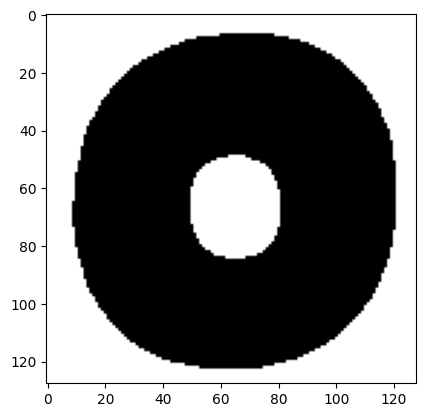

In [63]:
import matplotlib.pyplot as plt
# Get one batch of data
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Print the shape of images and labels
print(images.shape, labels.shape)

# Function to unnormalize and show an image
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.show()

# Print one image from the batch
imshow(images[0][0])
